In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/loan_prediction_train.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

## Distribution analysis

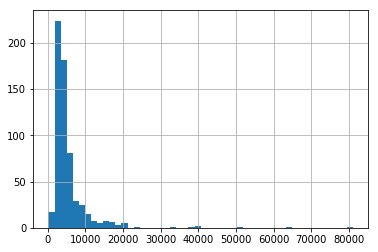

In [6]:
df['ApplicantIncome'].hist(bins=50)

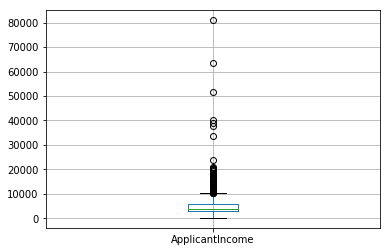

In [7]:
df.boxplot(column='ApplicantIncome')

C:\Users\rongchuanhe\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


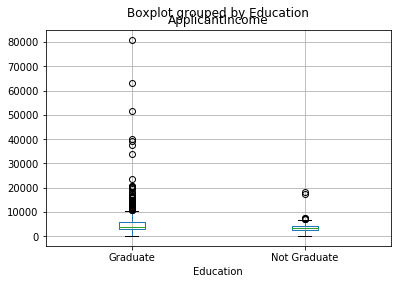

In [8]:
df.boxplot(column='ApplicantIncome', by='Education')

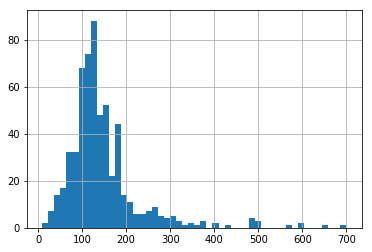

In [9]:
df['LoanAmount'].hist(bins=50)

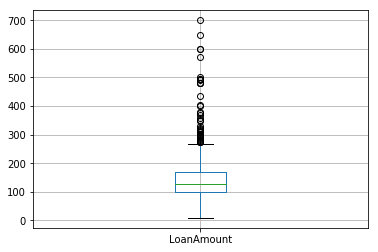

In [10]:
df.boxplot(column='LoanAmount')

## Categorical Variable Analysis

In [12]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())

print('Frequence Table for Credit History:')
print(temp1)

print ('\nProbability of getting loan for each Credit History class:')
print (temp2)

Frequence Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5,1,'Probability of getting loan by credit history')

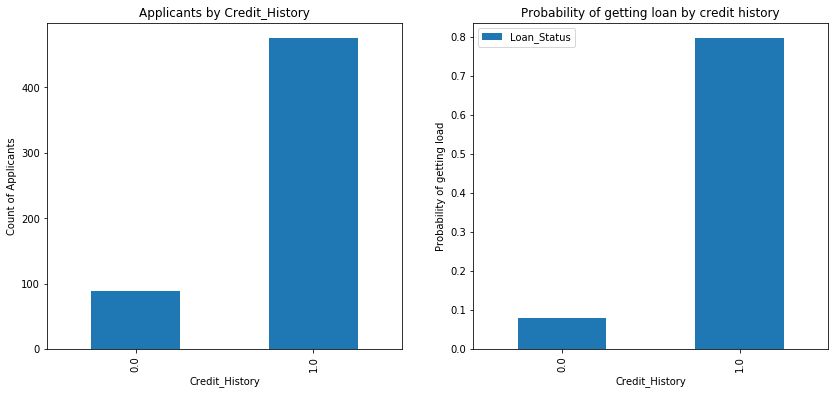

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].set_xlabel('Credit_History')
ax[0].set_ylabel('Count of Applicants')
ax[0].set_title('Applicants by Credit_History')
temp1.plot(kind='bar', ax=ax[0])

temp2.plot(kind='bar', ax=ax[1])
ax[1].set_xlabel('Credit_History')
ax[1].set_ylabel('Probability of getting load')
ax[1].set_title('Probability of getting loan by credit history')

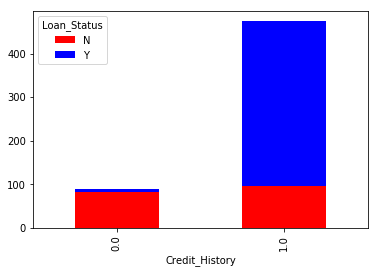

In [14]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red', 'blue'])

## Data Munging

In [15]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df = df.dropna()
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Building a Preditive Model

In [17]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for var in var_mod:
    df[var] = le.fit_transform(df[var])
    
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [19]:
from sklearn.linear_model import LogisticRegression


In [20]:
logit_model = LogisticRegression()
logit_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
predictors = df[['Credit_History']]
type(predictors)

pandas.core.frame.DataFrame

In [22]:
logit_model.fit(df[['Credit_History']], df['Loan_Status'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
from sklearn.cross_validation import KFold


C:\Users\rongchuanhe\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
kf = KFold(df.shape[0], n_folds=5)

error = []
for train, test in kf:
    train_predictors = df[['Credit_History']].iloc[train,:]
    train_target = df['Loan_Status'].iloc[train]
    logit_model.fit(train_predictors, train_target)
    
    error.append(logit_model.score(df[['Credit_History']].iloc[test,:], df['Loan_Status'].iloc[test]))

print("Cross-Validation Score ", np.mean(error))

Cross-Validation Score  0.808333333333


In [27]:
def fit_model(model, data, predictors, outcome, num_fold=5):
    kf =KFold(data.shape[0], n_folds=num_fold)
    error = []
    for train, test in kf:
        train_predictors = data[predictors].iloc[train,:]
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
        
    print("Cross-Validation Score :", np.mean(error))

    model.fit(data[predictors], data[outcome])
    accuracy = model.score(data[predictors], data[outcome])
    print("Accuracy: ", accuracy)
    return model


In [28]:
logit_model = LogisticRegression()
print(logit_model)
logit_model = fit_model(logit_model, df, ['Credit_History'], 'Loan_Status')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Cross-Validation Score : 0.808333333333
Accuracy:  0.808333333333


In [29]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
predictor_var = ['Credit_History', 'Gender', 'Married', 'Education']
outcome_var = 'Loan_Status'
decision_tree_model = fit_model(decision_tree_model, df, predictor_var, outcome_var)

Cross-Validation Score : 0.808333333333
Accuracy:  0.808333333333


In [30]:
predictor_var = ['Credit_History', 'Loan_Amount_Term', 'LoanAmount']
decision_tree_model = fit_model(decision_tree_model, df, predictor_var, outcome_var)

Cross-Validation Score : 0.677083333333
Accuracy:  0.904166666667
